In [0]:
### https://towardsdatascience.com/linear-regression-moneyball-part-1-b93b3b9f5b53

## Exploring the Data

In [4]:
import pandas as pd

df = pd.read_csv('./baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [20]:
df.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [0]:
df['RD'] = df['RS'] - df['RA']

In [22]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [6]:
df['Year'].count

<bound method Series.count of 0       2012
1       2012
2       2012
3       2012
4       2012
5       2012
6       2012
7       2012
8       2012
9       2012
10      2012
11      2012
12      2012
13      2012
14      2012
15      2012
16      2012
17      2012
18      2012
19      2012
20      2012
21      2012
22      2012
23      2012
24      2012
25      2012
26      2012
27      2012
28      2012
29      2012
        ... 
1202    1963
1203    1963
1204    1963
1205    1963
1206    1963
1207    1963
1208    1963
1209    1963
1210    1963
1211    1963
1212    1962
1213    1962
1214    1962
1215    1962
1216    1962
1217    1962
1218    1962
1219    1962
1220    1962
1221    1962
1222    1962
1223    1962
1224    1962
1225    1962
1226    1962
1227    1962
1228    1962
1229    1962
1230    1962
1231    1962
Name: Year, Length: 1232, dtype: int64>

In [0]:
import matplotlib.pyplot as plt

In [0]:
# 2002년 기준으로 데이터를 나눔
#moneyball0=df.loc[df.Year < 2002, : ]
#moneyball1=df.loc[df.Year >= 2002, : ]

In [0]:
moneyball0 = df.loc[df.Playoffs == 0, :]
moneyball1 = df.loc[df.Playoffs == 1, :]

In [31]:
moneyball0

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405,72
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430,-178
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470,-132
10,HOU,NL,2012,583,794,55,0.302,0.371,0.236,0,NaN,NaN,162,0.337,0.427,-211
11,KCR,AL,2012,676,746,72,0.317,0.400,0.265,0,NaN,NaN,162,0.339,0.423,-70
12,LAA,AL,2012,767,699,89,0.332,0.433,0.274,0,NaN,NaN,162,0.310,0.403,68
13,LAD,NL,2012,637,597,86,0.317,0.374,0.252,0,NaN,NaN,162,0.310,0.364,40


In [32]:
moneyball0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 1231
Data columns (total 16 columns):
Team            988 non-null object
League          988 non-null object
Year            988 non-null int64
RS              988 non-null int64
RA              988 non-null int64
W               988 non-null int64
OBP             988 non-null float64
SLG             988 non-null float64
BA              988 non-null float64
Playoffs        988 non-null int64
RankSeason      0 non-null float64
RankPlayoffs    0 non-null float64
G               988 non-null int64
OOBP            306 non-null float64
OSLG            306 non-null float64
RD              988 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 131.2+ KB


In [33]:
moneyball1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 1229
Data columns (total 16 columns):
Team            244 non-null object
League          244 non-null object
Year            244 non-null int64
RS              244 non-null int64
RA              244 non-null int64
W               244 non-null int64
OBP             244 non-null float64
SLG             244 non-null float64
BA              244 non-null float64
Playoffs        244 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               244 non-null int64
OOBP            114 non-null float64
OSLG            114 non-null float64
RD              244 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 32.4+ KB


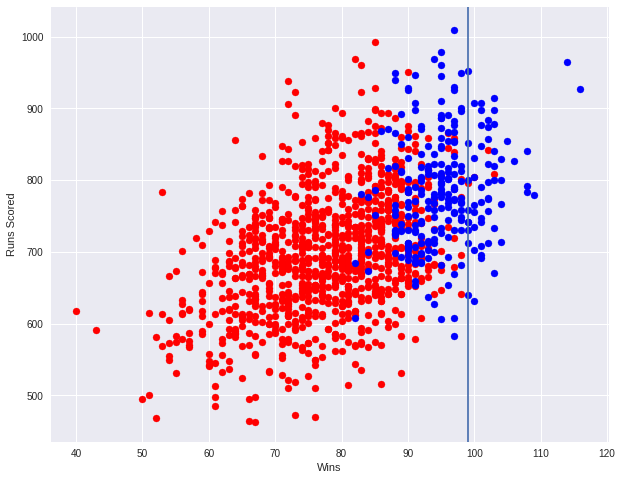

In [34]:
# plotting scatterplot


plt.figure(figsize=(10, 8))
plt.scatter(x=moneyball0.W, y = moneyball0.RS, c='red')
plt.scatter(x=moneyball1.W, y = moneyball1.RS, c='blue')
plt.xlabel('Wins')
plt.ylabel('Runs Scored')
plt.axvline(x=99)

In [0]:
import numpy as np

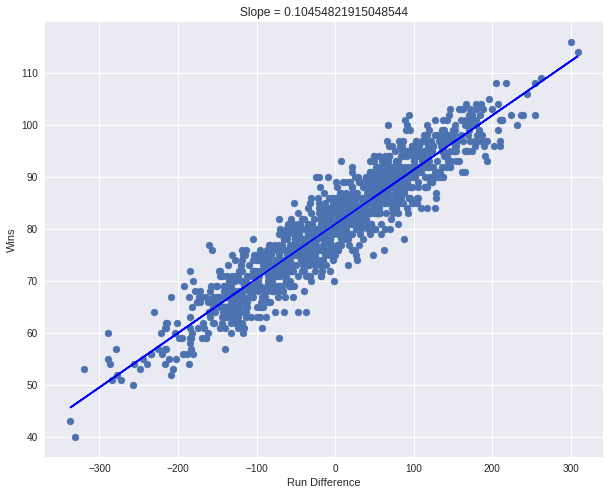

In [37]:
x = np.array(df.RD)
y = np.array(df.W)

# Deriving slope, intercept values

slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope*i + intercept for i in x]

# plotting the figure

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title('Slope = %s' % (slope))
plt.xlabel('Run Difference')
plt.ylabel('Wins')
plt.show()


In [38]:
print(np.corrcoef(x, y))

[[1.         0.93785107]
 [0.93785107 1.        ]]


## EDA

In [39]:
# Correlation between On-base percentage and runs scored.

print(np.corrcoef(df.OBP, df.RS))

[[1.         0.90049221]
 [0.90049221 1.        ]]


In [40]:
# Correlation between Slugging percentage and runs scored.
print(np.corrcoef(df.SLG, df.RS))

[[1.         0.91873996]
 [0.91873996 1.        ]]


In [41]:
# Correlation between batting average and runs scored.
print(np.corrcoef(df.BA, df.RS))

[[1.         0.82699964]
 [0.82699964 1.        ]]


## Model builing

### RS_model1

In [0]:
# Extracting our bariables from the dataframe.
x = df[['OBP', 'SLG', 'BA']].values
y = df[['RS']].values

In [0]:
# Calling our model object.
from sklearn.linear_model import LinearRegression

In [0]:
RS_model1 = LinearRegression()

In [59]:
# Fitting the model.
RS_model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
# Printing model intercept and coefficients.
print(RS_model1.intercept_)
print(RS_model1.coef_)

[-806.08452907]
[[2900.9403354  1533.88483471 -134.90497379]]


In [0]:
# -> RS = -806 + 2900*(OBP) + 1533*(SLG) -134*(BA)

### RS_model2

In [0]:
# Extracting our variables from the dataframe.
x = df[['OBP', 'SLG']].values
y = df[['RS']].values

In [0]:
# Calling our model object.
RS_model2 = LinearRegression()

In [64]:
# Fitting the model.
RS_model2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
# Printing model intercept and coefficients.
print(RS_model2.intercept_)
print(RS_model2.coef_)

[-811.66242009]
[[2830.70470463 1517.57843237]]


In [0]:
# -> RS = -811 + 2830*(OBP) + 1517*(SLG)

### RA_model 1

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
RD              1232 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 154.1+ KB


In [0]:
dfnew = df.dropna()

In [0]:
# Extracting our variables from the dataframe.
x = dfnew[['OOBP', 'OSLG']].values
y = dfnew[['RA']].values

In [0]:
# Calling our model object.
RA_model1 = LinearRegression()

In [75]:
# Fitting the model.
RA_model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Printing model intercept and coefficients.
print(RA_model1.intercept_)
